In [8]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import scipy.integrate

import qubic

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [135]:
nside = 1024
npix = 12 * nside**2

maximum_length = 300  # Correlation length for water vapor density (m)
h = 4869  # Height for QUBIC (m)
Lz = 1000  # Atm depth (m)

maximum_angular_scale = np.degrees(np.arctan(maximum_length / Lz))

def water_vapor_density(z, rho_0=1, h0=1000):
    return rho_0 * np.exp(-np.log(2) * (z - 5190) / h0)

def kolmogorov_spectra(l):
    k = l / maximum_angular_scale
    return (1 + k**2)**(-11/6)

l_max = 3 * nside - 1

def normalized_kolmogorov(l):
    norm = integrate.quad(lambda l_prime: kolmogorov_spectra(l_prime) * l_prime, 0, l_max)[0]
    return kolmogorov_spectra(l) / norm

l_values = np.arange(l_max + 1)
cl = normalized_kolmogorov(l_values)
alm = hp.synalm(cl, lmax=l_max, new=True)

delta_rho = hp.alm2map(alm, nside)

### Normalize fluctuations
mean_delta = np.mean(delta_rho)
var_delta = np.var(delta_rho)
delta_rho_normalized = (delta_rho - mean_delta) / np.sqrt(var_delta)

mean_water_vapor = water_vapor_density(h + Lz)
PWV = 5  # mm^-1
sigma_PWV = 0.5  # mm^-1
sigma_rho = sigma_PWV / PWV * mean_water_vapor

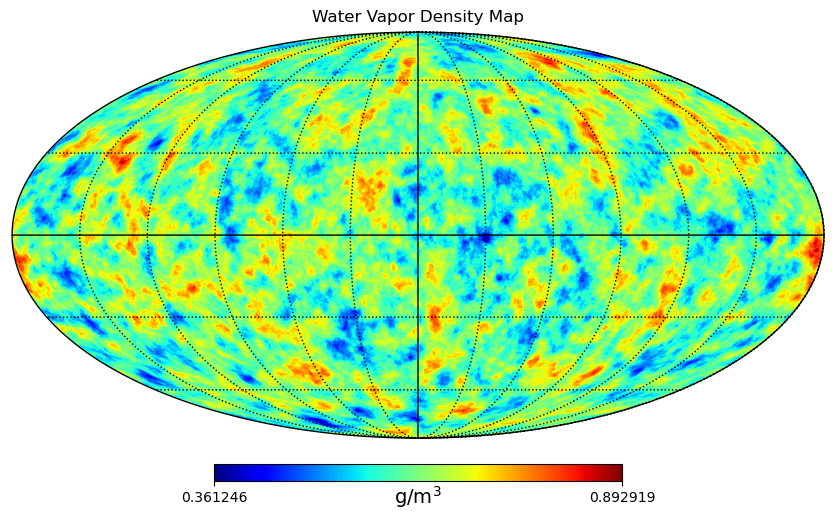

In [136]:
rho_map = mean_water_vapor + sigma_rho * delta_rho_normalized

hp.mollview(rho_map, cmap='jet', title="Water Vapor Density Map", unit=r'g/m$^3$')
hp.graticule()

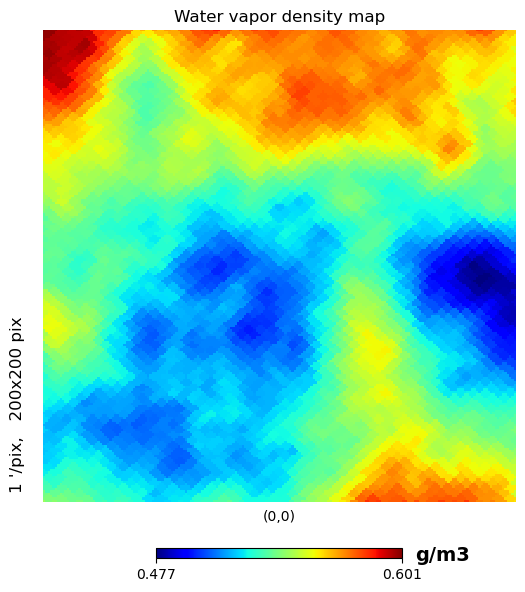

In [137]:
hp.gnomview(rho_map, reso = 1, cmap='jet', title='Water vapor density map', unit='g/m3')

In [138]:
np.degrees(np.arctan(3/10))

16.69924423399362